In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Frequency Analysis 
import numpy as np 
def FFT(ds, lenght, fs, max_freq, array = False):
    if max_freq == 50:
        div_factor = 2
        freq = (fs/lenght)*np.arange(0,(lenght/div_factor))
    elif max_freq == 25:
        div_factor = 4
        freq = (fs/lenght)*np.arange(0,(lenght/div_factor))
    elif max_freq == 12.5: 
        div_factor = 8
        freq = (fs/lenght)*np.arange(0,(floor(lenght/div_factor)))
    else: 
        raise ValueError("Entered Frequency is not valid")

    if array == False: 
        fft = np.abs(np.real(np.fft.fft(ds)))
        fft = (div_factor/lenght)*fft[2: int(( lenght/div_factor)+2)]
    elif array == True: 
        fft = np.abs(np.real(np.fft.fft(ds, axis = 0)))
        fft = (div_factor/ lenght)*fft[2: int(( lenght/div_factor)+2), :]
 
    return freq, fft



In [4]:
with open('../data/berkely/callibration_data/LOG0001.TXT') as f:
    lines = f.readlines()

In [5]:
x,y,z = [],[],[]
for line in range(0, len(lines)): 
    x_temp = lines[line][3:7]
    y_temp = lines[line][10:14]
    #z_temp = lines[line][17:21]
    
    x = np.append(x, x_temp)
    y = np.append(y, y_temp)
    #z = np.append(z,z_temp)

In [6]:
uint16_t = lambda x: [int(i, 16) for i in x] 
int16_t = lambda x: [-(i&0x8000) | (i&0x7fff) for i in x]

x_int = np.array(int16_t(uint16_t(x)))
y_int = np.array(int16_t(uint16_t(y)))
#z_int = np.array(int16_t(uint16_t(z)))

In [7]:
conv = 2/((2**15)) 
#initial_win = 10000
#end_win     = 10000+(100*10)

#start = int(initial_win)
#end = int(end_win)
#period = end - start 


window_x = x_int * conv
window_y = y_int * conv
#window_z = z_int[start:end]*conv

In [8]:
print(len(window_x))

31500


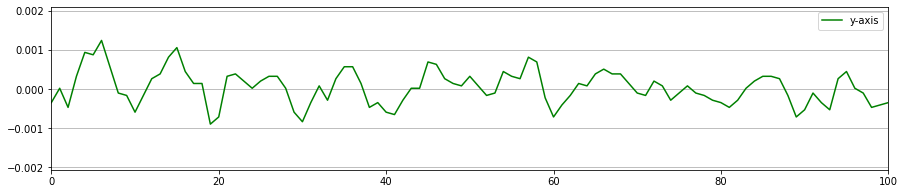

In [9]:
plt.figure(figsize = (15,3))
period_init = 10_000
period_end = 15_000
#time = np.arange(end-start)
#plt.plot(time, window_x, label = 'x-axis', color = 'blue')
plt.plot(window_y[period_init:period_end] - np.mean(window_y[period_init:period_end]), label = 'y-axis', color = 'green')
#plt.plot(time, window_z, label = 'z-axis', color = 'orange')
plt.legend()
plt.xlim([0,100])
plt.grid(axis = 'y')
plt.show()

In [10]:
fs = 107.7
window_len = 5_000
max_freq = 50 


freq, fft_x = FFT(window_x[period_init:period_end], window_len, fs, max_freq, False)
_ , fft_y = FFT(window_y[period_init:period_end], window_len, fs, max_freq, False )
#_ , fft_z = FFT(window_z, window_len, fs, max_freq, False)

<IPython.core.display.Javascript object>


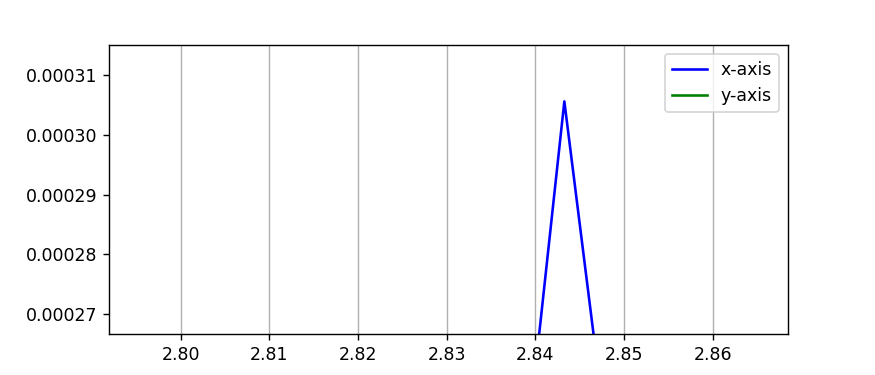

In [11]:
%matplotlib notebook
plt.figure(figsize= (7,3))
plt.plot(freq, fft_x, color = 'blue', label = 'x-axis')
plt.plot(freq, fft_y, color = 'green', label = 'y-axis')
#plt.plot(freq, fft_z, color = 'orange', label = 'z-axis')
plt.legend()
plt.grid(axis = 'x')
#plt.xlim([0,5])
plt.show()

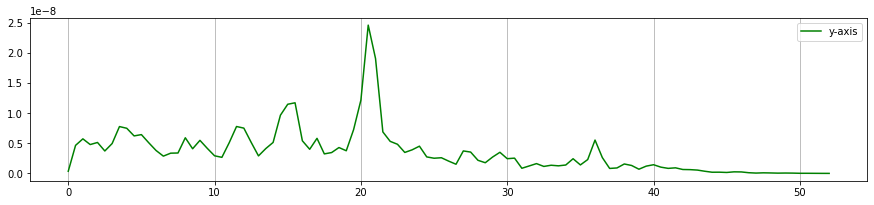

In [13]:
#PSD - Weltch Stemitaor 
fs = 104
segment_len = 104*2
from scipy import signal 
#f, Pxx_den = signal.welch(window_x, fs, nperseg=segment_len)
f, Pyy_den = signal.welch(window_y, fs, nperseg=segment_len)
#_, Pzz_den = signal.welch(window_z, fs, nperseg=segment_len)


plt.figure(figsize = (15,3))
#plt.plot(f, Pxx_den, color = 'blue', label = 'x-axis')
plt.plot(f, Pyy_den, color = 'green', label = 'y-axis')
#plt.plot(f, Pzz_den, color = 'orange', label = 'z-axis')
plt.legend()
plt.grid(axis = 'x')

#plt.figure(figsize = (15,3))
#plt.semilogy(f, Pxx_den, color = 'blue', label = 'x-axis')
#plt.semilogy(f, Pyy_den, color = 'green', label = 'y-axis')
#plt.semilogy(f, Pzz_den, color = 'orange', label = 'z-axis')
#plt.legend()
#plt.grid(axis = 'x')

plt.show()

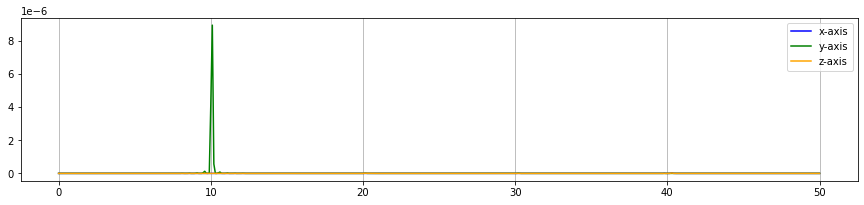

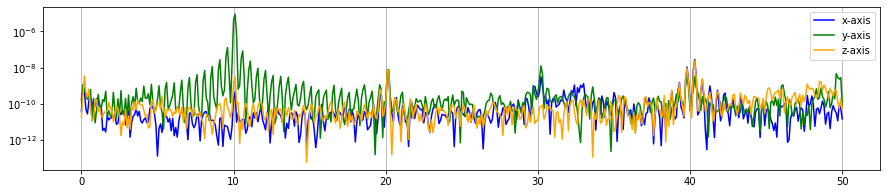

In [95]:
# PSD - Periodogram
from scipy import signal 

fs = 100
window_type = 'hamming'
from scipy import signal 
f, Pxx_den = signal.periodogram(window_x, fs, window=window_type)
_, Pyy_den = signal.periodogram(window_y, fs, window=window_type)
_, Pzz_den = signal.periodogram(window_z, fs, window=window_type)

plt.figure(figsize = (15,3))
plt.plot(f, Pxx_den, color = 'blue', label = 'x-axis')
plt.plot(f, Pyy_den, color = 'green', label = 'y-axis')
plt.plot(f, Pzz_den, color = 'orange', label = 'z-axis')
plt.legend()
plt.grid(axis = 'x')

plt.figure(figsize = (15,3))
plt.semilogy(f, Pxx_den, color = 'blue', label = 'x-axis')
plt.semilogy(f, Pyy_den, color = 'green', label = 'y-axis')
plt.semilogy(f, Pzz_den, color = 'orange', label = 'z-axis')
plt.legend()
plt.grid(axis = 'x')

plt.show()